In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

In [2]:
env = Maze()

D:\A\envs\tensorflow\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


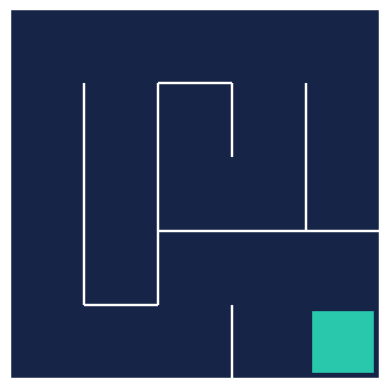

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
env.close()

In [5]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


In [6]:
action_values = np.zeros(shape=(5, 5, 4))

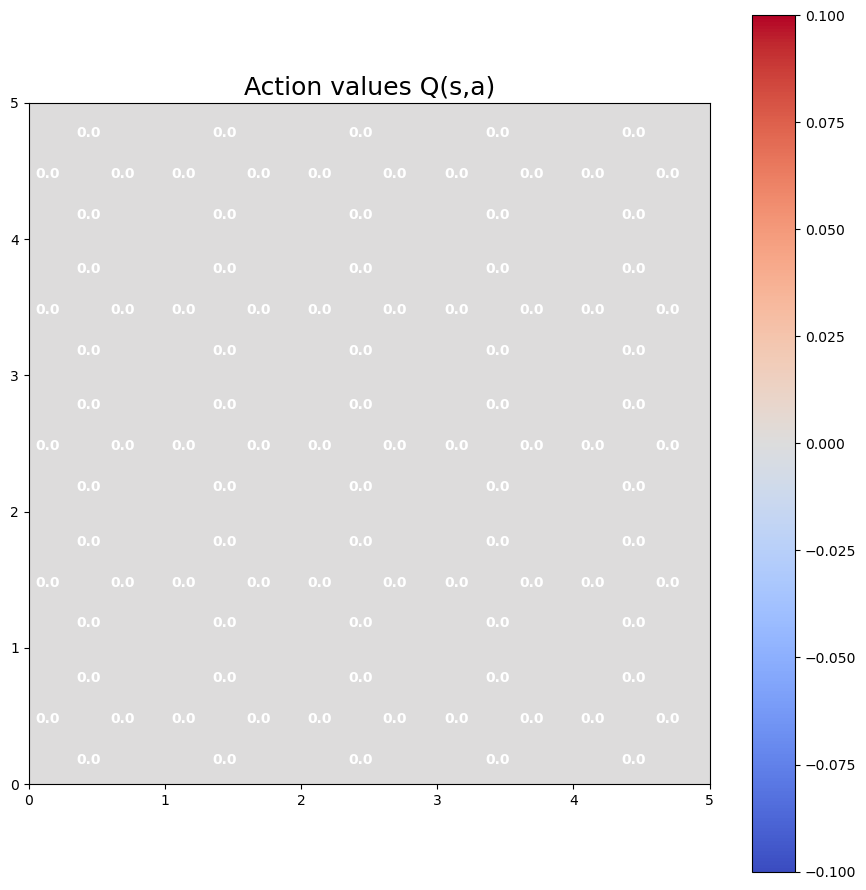

In [7]:
plot_action_values(action_values)

In [8]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max())) 

In [9]:
action = policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 2


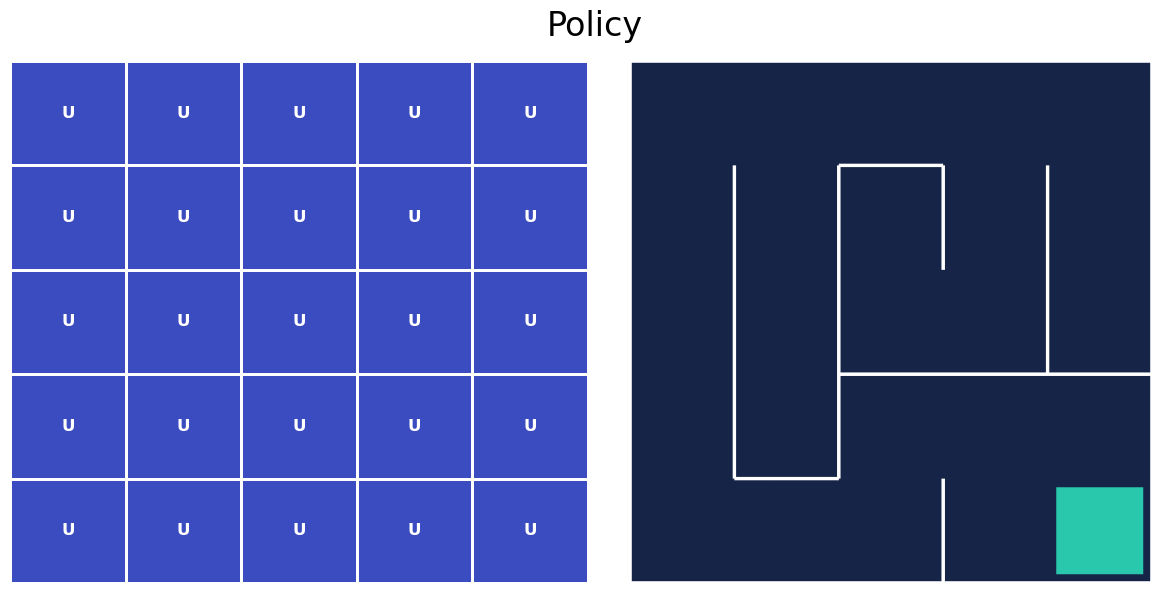

In [10]:
plot_policy(action_values, frame)

In [11]:
def constant_alpha_mc(policy, action_values, episodes, gamma=0.99,epsilon=0.2,alpha=0.1):
    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []
    
        while not done:
            action = policy(state,epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action,reward])
            state = next_state
        
        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])

In [12]:
constant_alpha_mc(policy, action_values, episodes=1000)

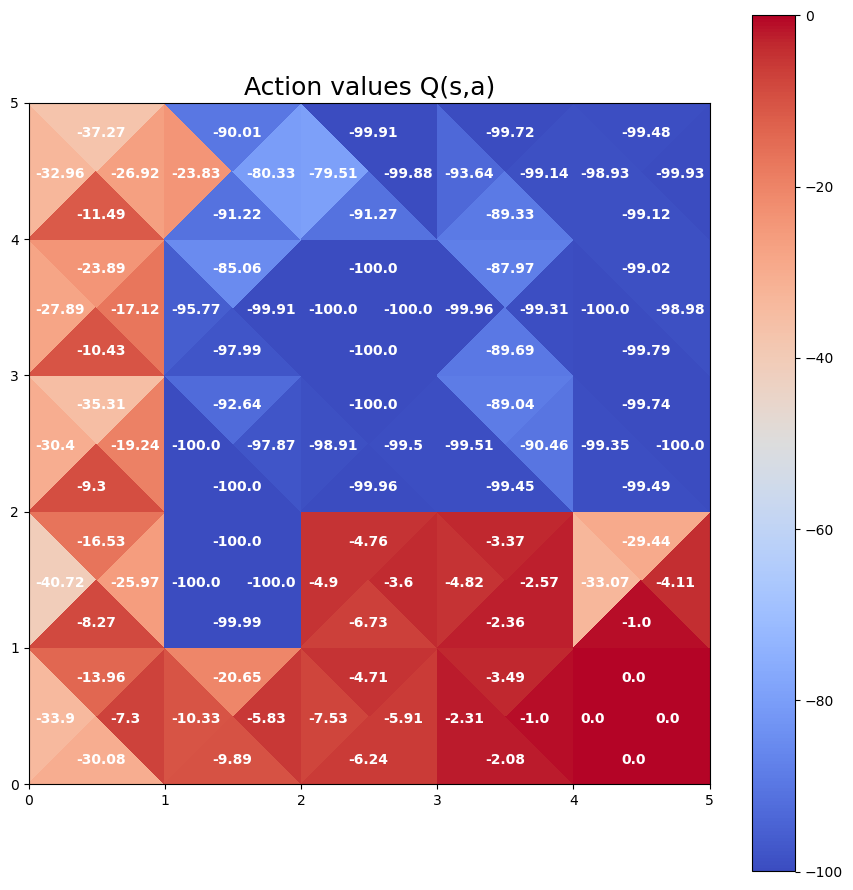

In [13]:
plot_action_values(action_values)

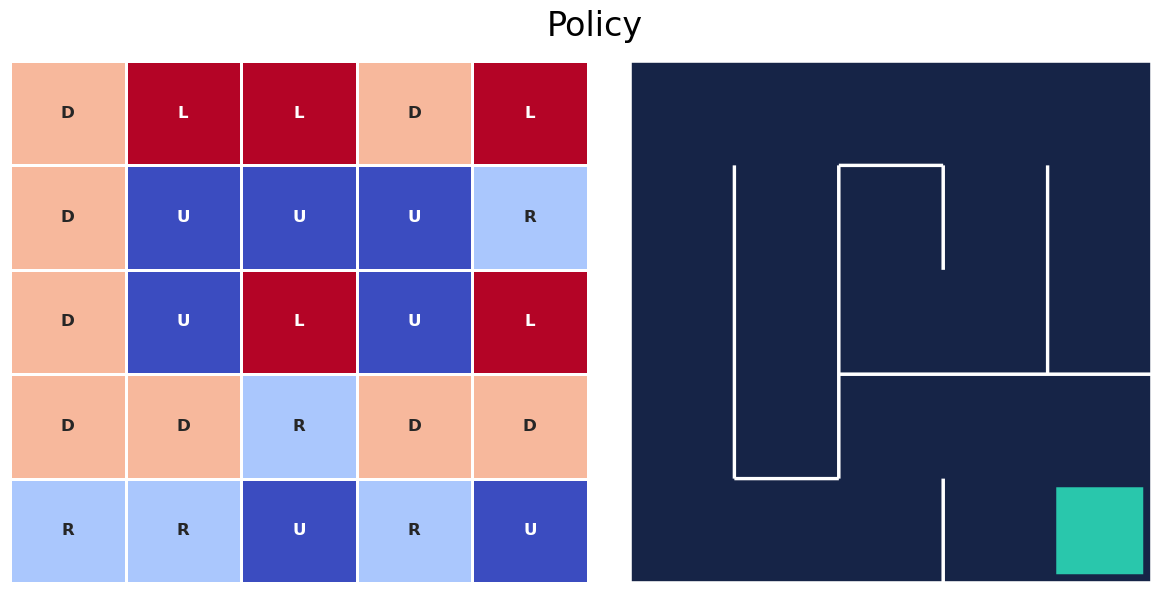

In [14]:
plot_policy(action_values, frame)

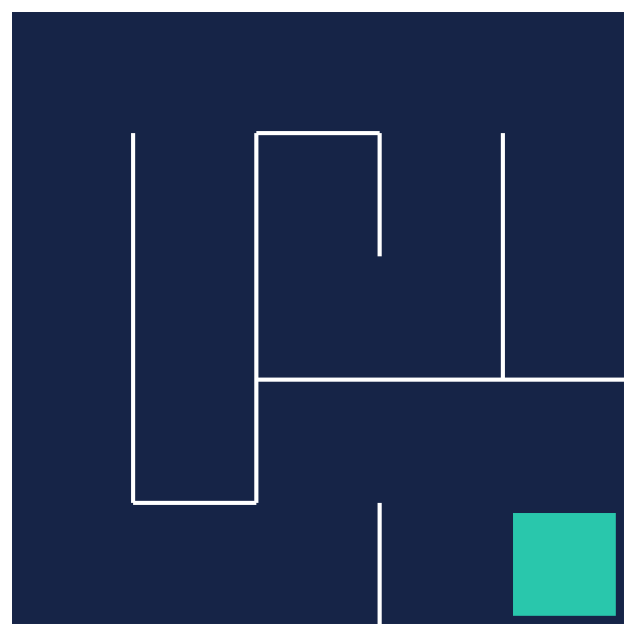

In [15]:
test_agent(env, policy)